In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt  
import csv
import random
from SentimentAnalyser import get_articles
import unicodedata
import yfinance as yf

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
sia = SentimentIntensityAnalyzer()
# stock market lexicon
stock_lex = pd.read_csv('lexicon_data/stock_lex.csv')
stock_lex['sentiment'] = (stock_lex['Aff_Score'] + stock_lex['Neg_Score'])/2
stock_lex = dict(zip(stock_lex.Item, stock_lex.sentiment))
stock_lex = {k:v for k,v in stock_lex.items() if len(k.split(' '))==1}
stock_lex_scaled = {}
for k, v in stock_lex.items():
    if v > 0:
        stock_lex_scaled[k] = v / max(stock_lex.values()) * 4
    else:
        stock_lex_scaled[k] = v / min(stock_lex.values()) * -4

# # # Loughran and McDonald
positive = []
with open('lexicon_data/lm_positive.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        positive.append(row[0].strip())
    
negative = []
with open('lexicon_data/lm_negative.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        entry = row[0].strip().split(" ")
        if len(entry) > 1:
            negative.extend(entry)
        else:
            negative.append(entry[0])

final_lex = {}
final_lex.update({word:2.0 for word in positive})
final_lex.update({word:-2.0 for word in negative})
final_lex.update(stock_lex_scaled)
final_lex.update(sia.lexicon)
sia.lexicon = final_lex

In [4]:
data = get_articles('Apple')

In [5]:
data

,date,publishedAt,name,title,url
0,2020-10-31,2020-10-31T08:03:50Z,Bloomberg,Apple Daily's Lai Denies Involvement in Biden ...,https://www.bloomberg.com/news/articles/2020-1...
1,2020-10-30,2020-10-30T22:55:40Z,Bloomberg,Apple Told to Pay VirnetX $503 Million in Secu...,https://www.bloomberg.com/news/articles/2020-1...
2,2020-10-30,2020-10-30T22:48:03Z,Bloomberg,Apple to Replace Some AirPods Pro Earbuds Afte...,https://www.bloomberg.com/news/articles/2020-1...
3,2020-10-30,2020-10-30T20:22:57Z,Bloomberg,Apple Loses $450 Billion in Value Since Record...,https://www.bloomberg.com/news/articles/2020-1...
4,2020-10-30,2020-10-30T19:16:44Z,Bloomberg,Apple Warns That Reduced App Store Cut Would H...,https://www.bloomberg.com/news/articles/2020-1...
5,2020-10-30,2020-10-30T18:13:13Z,Bloomberg,Apple Shares Tumble,https://www.bloomberg.com/news/videos/2020-10-...
6,2020-10-30,2020-10-30T07:42:54Z,Bloomberg,"Stock Markets Today: Virus Lockdowns, Apple, F...",https://www.bloomberg.com/news/newsletters/202...
7,2020-10-30,2020-10-30T00:47:00Z,Bloomberg,"Apple iPhone Delay Hurt China Sales, Leaving a...",https://www.bloomberg.com/news/articles/2020-1...
8,2020-10-29,2020-10-29T22:01:53Z,Bloomberg,"Apple Shows It Can Weather Covid Storm, Forres...",https://www.bloomberg.com/news/videos/2020-10-...
9,2020-10-29,2020-10-29T21:08:16Z,Bloomberg,Why Apple Shares Are Falling After Earnings Re...,https://www.bloomberg.com/news/videos/2020-10-...


In [6]:
df = pd.DataFrame(columns = ['Date', 'Title'])

In [7]:
indx=0
get_news=""
for i in range(0,len(data)-1):
    get_date=data.date.iloc[i]
    next_date=data.date.iloc[i+1]
    if((str(get_date)!=str(next_date))):
        get_news=get_news+data.title.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        df.loc[indx]= [get_date, get_news]
        indx=indx+1
        get_news=" "

In [8]:
a_df = yf.download('AAPL', 
                      start=df.Date.iloc[len(df)-1], 
                      end=df.Date.iloc[0], 
                      progress=False)
aapl_df = a_df.sort_index(ascending=True)
aapl_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-06,115.699997,116.120003,112.250000,113.160004,113.160004,161498200
2020-10-07,114.620003,115.550003,114.129997,115.080002,115.080002,96849000
2020-10-08,116.250000,116.400002,114.589996,114.970001,114.970001,83477200
2020-10-09,115.279999,117.000000,114.919998,116.970001,116.970001,100506900
2020-10-12,120.059998,125.180000,119.279999,124.400002,124.400002,240226800
2020-10-13,125.269997,125.389999,119.650002,121.099998,121.099998,262330500
2020-10-14,121.000000,123.029999,119.620003,121.190002,121.190002,151062300
2020-10-15,118.720001,121.199997,118.150002,120.709999,120.709999,112559200
2020-10-16,121.279999,121.550003,118.809998,119.019997,119.019997,115393800


In [9]:
df['adj_close_price']=""
indx=0
for i in range (0,len(df)):
    for j in range (0,len(aapl_df)):
        get_news_date=df.Date.iloc[i]
        get_stock_date=aapl_df.index[j].strftime('%Y-%m-%d')
        if((get_stock_date==get_news_date)):
            df.adj_close_price.iloc[i]=int(aapl_df['Adj Close'][j])

In [10]:
mean=0
summ=0
count=0
for i in range(0,len(df)):
    if(df.adj_close_price.iloc[i]!=""):
        summ=summ+int(df.adj_close_price.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(df)):
    if(df.adj_close_price.iloc[i]==""):
        df.adj_close_price.iloc[i]=int(mean)
df

,Date,Title,adj_close_price
0,2020-10-31,Apple Daily's Lai Denies Involvement in Biden ...,116
1,2020-10-30,"Apple iPhone Delay Hurt China Sales, Leaving ...",108
2,2020-10-29,"Amazon, Apple Probed by Germany Over Online S...",115
3,2020-10-27,Apple Buys Vilynx Self-Learning AI Video Star...,116
4,2020-10-26,"Apple Developing Smaller AirPods Pro, Revampe...",115
5,2020-10-24,Apple Cable Supplier to Start Mass Production...,116
6,2020-10-23,Apple and Netflix Discussed Acquiring 'Bond' ...,115
7,2020-10-21,Apple Lobbies for Lower Taxes to Boost U.S. C...,116
8,2020-10-20,Apple Pushes Back Against Patent Trolls in Th...,117
9,2020-10-19,Maybe Apple Isn’t as Green as It Claims – Blo...,115


In [11]:
df['adj_close_price'] = df['adj_close_price'].apply(np.int64)
df["Comp"] = ''
df["Negative"] = ''
df["Neutral"] = ''
df["Positive"] = ''
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in df.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', df.loc[indexx, 'Title'])
        sentence_sentiment = sia.polarity_scores(sentence_i)
        df.Comp.iloc[indexx]=sentence_sentiment['compound']
        df.Negative.iloc[indexx]=sentence_sentiment['neg']
        df.Neutral.iloc[indexx]=sentence_sentiment['neu']
        df.Positive.iloc[indexx]=sentence_sentiment['pos']
    except TypeError:
        print (stocks_dataf.loc[indexx, 'title'])
        print (indexx)
df

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Date,Title,adj_close_price,Comp,Negative,Neutral,Positive
0,2020-10-31,Apple Daily's Lai Denies Involvement in Biden ...,116,-0.2157,0.356,0.366,0.278
1,2020-10-30,"Apple iPhone Delay Hurt China Sales, Leaving ...",108,-0.2906,0.368,0.219,0.413
2,2020-10-29,"Amazon, Apple Probed by Germany Over Online S...",115,0.4315,0.195,0.233,0.572
3,2020-10-27,Apple Buys Vilynx Self-Learning AI Video Star...,116,0.6358,0.154,0.376,0.47
4,2020-10-26,"Apple Developing Smaller AirPods Pro, Revampe...",115,0.2062,0.316,0.386,0.298
5,2020-10-24,Apple Cable Supplier to Start Mass Production...,116,0.5697,0.305,0.068,0.626
6,2020-10-23,Apple and Netflix Discussed Acquiring 'Bond' ...,115,0.1296,0.118,0.407,0.475
7,2020-10-21,Apple Lobbies for Lower Taxes to Boost U.S. C...,116,0.3504,0.327,0.127,0.546
8,2020-10-20,Apple Pushes Back Against Patent Trolls in Th...,117,0.8432,0.067,0.185,0.748
9,2020-10-19,Maybe Apple Isn’t as Green as It Claims – Blo...,115,0.4411,0.084,0.168,0.748


In [12]:
df_=df[['Date','adj_close_price','Comp','Negative','Neutral','Positive']].copy()
df_=df_.set_index('Date')
df_

,adj_close_price,Comp,Negative,Neutral,Positive
Date,,,,,
2020-10-31,116,-0.2157,0.356,0.366,0.278
2020-10-30,108,-0.2906,0.368,0.219,0.413
2020-10-29,115,0.4315,0.195,0.233,0.572
2020-10-27,116,0.6358,0.154,0.376,0.47
2020-10-26,115,0.2062,0.316,0.386,0.298
2020-10-24,116,0.5697,0.305,0.068,0.626
2020-10-23,115,0.1296,0.118,0.407,0.475
2020-10-21,116,0.3504,0.327,0.127,0.546
2020-10-20,117,0.8432,0.067,0.185,0.748


In [13]:
test = df_.iloc[0:5]
train = df_.iloc[6:17]

In [14]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

In [15]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

In [16]:
y_train = pd.DataFrame(train['adj_close_price'])
y_test = pd.DataFrame(test['adj_close_price'])

In [17]:
!pip install treeinterpreter

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [19]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [20]:
y_train = pd.DataFrame(train['adj_close_price'])
y_test = pd.DataFrame(test['adj_close_price'])

In [21]:
rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [22]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [23]:
predictions_df_ = pd.DataFrame(data=prediction[0:], index = df_.iloc[0:5].index, columns=['Predicted Prices'])
predictions_df_['Actual Prices']=test['adj_close_price']


40.0


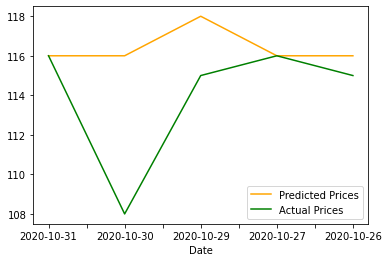

In [28]:
predictions_df_['Predicted Prices']=predictions_df_['Predicted Prices'].apply(np.int64)
print(accuracy_score(predictions_df_['Actual Prices'],predictions_df_['Predicted Prices'])*100)
predictions_df_.plot(color=['orange','green'])